**UTILIZING DIFFERENT MACHINE LEARNING MODELS, TRAINING THEM ON OUR DATASET AND TESTING OUR MODEL BY DIFFERENT PARAMETERS SUCH AS ACCURACY, VALIDATION LOSS, PRECISION, F1 SCORE AND DISPLAYING OUR RESULTS BY DIFFERENT PLOTS AND TRENDS. WE HAVE FOCUSSED ON TREND PREDICTION OF QUANTITATIVE TRADES, ALONG WITH PRICE PREDICTION OF TRADES**

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('btc_1h.csv')

In [3]:
df.head()

datetime      open      high       low     close      volume
0  2018-01-01 05:30:00  13715.65  13715.65  13400.01  13529.01  443.356199
1  2018-01-01 06:30:00  13528.99  13595.89  13155.38  13203.06  383.697006
2  2018-01-01 07:30:00  13203.00  13418.43  13200.00  13330.18  429.064572
3  2018-01-01 08:30:00  13330.26  13611.27  13290.00  13410.03  420.087030
4  2018-01-01 09:30:00  13434.98  13623.29  13322.15  13601.01  340.807329

In [ ]:
df_2020 = df

**PLOTING THE ENTIRE DATASET AND PRE-PROCESSING**

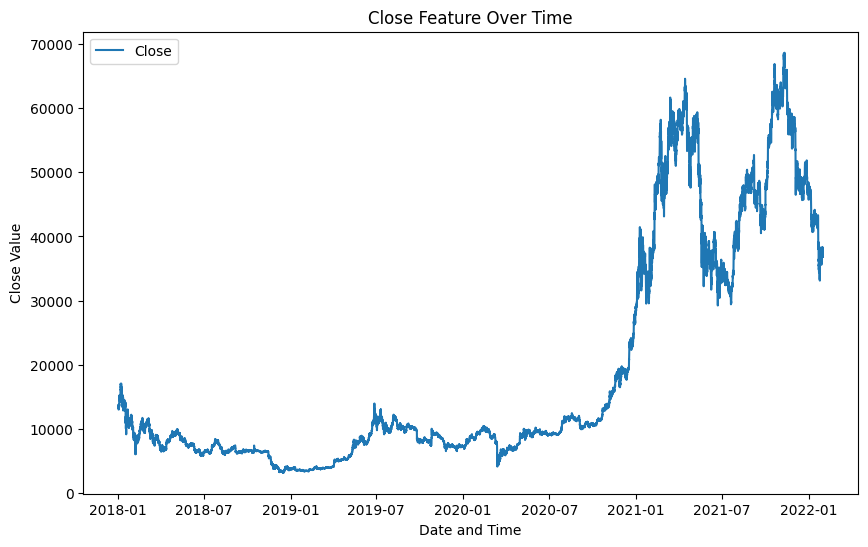

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'df' and the datetime column is 'timestamp'
# If your datetime column is already the index, skip the first line

# Convert 'timestamp' column to datetime object
df['datetime'] = pd.to_datetime(df['datetime'])

# Plot 'Close' feature over time
plt.figure(figsize=(10, 6))
plt.plot(df['datetime'], df['close'], label='Close')
plt.title('Close Feature Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Close Value')
plt.legend()
plt.show()

**ENCODING A NEW FEATURE NAMELY, PRICE DIRECTION**

In [5]:
import pandas as pd

# Assuming 'df' is your DataFrame with the 'close' feature

# Create a new column 'Price_Direction' and set default value to -1
df['Price_Direction'] = -1

# Identify where today's price is greater than yesterday's and set the corresponding 'Price_Direction' to 1
df.loc[df['close'] > df['close'].shift(1), 'Price_Direction'] = 1

# Identify where today's price is lesser than yesterday's and set the corresponding 'Price_Direction' to 0
df.loc[df['close'] < df['close'].shift(1), 'Price_Direction'] = 0

# Drop rows where 'Price_Direction' is still -1 (not updated)
df = df[df['Price_Direction'] != -1]

# Display the updated DataFrame
print(df.head())

             datetime      open      high       low     close      volume  \
1 2018-01-01 06:30:00  13528.99  13595.89  13155.38  13203.06  383.697006   
2 2018-01-01 07:30:00  13203.00  13418.43  13200.00  13330.18  429.064572   
3 2018-01-01 08:30:00  13330.26  13611.27  13290.00  13410.03  420.087030   
4 2018-01-01 09:30:00  13434.98  13623.29  13322.15  13601.01  340.807329   
5 2018-01-01 10:30:00  13615.20  13699.00  13526.50  13558.99  404.229046   

   Price_Direction  
1                0  
2                1  
3                1  
4                1  
5                0  


In [ ]:
df[df['datetime'].split('-')]

**EMPLOYING BOXCOX TRANSFORMATION**

In [9]:
import numpy as np
from scipy.stats import boxcox
import pandas as pd

# Assuming 'df' is your DataFrame with columns 'Open', 'Close', 'High', 'Low'

# Extract the features you want to transform
features_to_transform = ['open', 'volume', 'high', 'low']

# Apply Box-Cox transformation to each feature
for feature in features_to_transform:
    # Add a small constant to avoid issues with zero values
    transformed_feature, lambda_value = boxcox(df[feature] + 1)  # Adding 1 to avoid zero values
    df[feature] = transformed_feature

    print(f"Optimal lambda for {feature}: {lambda_value:.4f}")

# Display the original and transformed data
print("Original Data:")
print(df[features_to_transform].head())

print("\nTransformed Data:")
print(df.head())

Optimal lambda for open: -0.4192
Optimal lambda for volume: -0.0606
Optimal lambda for high: -0.4185
Optimal lambda for low: -0.4201
Original Data:
       open    volume      high       low
1  2.341277  4.997534  2.344781  2.336235
2  2.340823  5.075007  2.344536  2.336298
3  2.341002  5.060386  2.344802  2.336424
4  2.341148  4.914811  2.344819  2.336469
5  2.341395  5.033734  2.344922  2.336750

Transformed Data:
             datetime      open      high       low     close    volume  \
1 2018-01-01 06:30:00  2.341277  2.344781  2.336235  13203.06  4.997534   
2 2018-01-01 07:30:00  2.340823  2.344536  2.336298  13330.18  5.075007   
3 2018-01-01 08:30:00  2.341002  2.344802  2.336424  13410.03  5.060386   
4 2018-01-01 09:30:00  2.341148  2.344819  2.336469  13601.01  4.914811   
5 2018-01-01 10:30:00  2.341395  2.344922  2.336750  13558.99  5.033734   

   Price_Direction  
1                0  
2                1  
3                1  
4                1  
5                0  


In [10]:
df.drop(columns='close',inplace=True)

In [11]:
df.set_index('datetime',inplace=True)

In [12]:
df.shape

(35651, 5)

In [13]:
train = df.drop(columns='Price_Direction')
test = df['Price_Direction']

In [14]:
train.head()

open      high       low    volume
datetime                                                   
2018-01-01 06:30:00  2.341277  2.344781  2.336235  4.997534
2018-01-01 07:30:00  2.340823  2.344536  2.336298  5.075007
2018-01-01 08:30:00  2.341002  2.344802  2.336424  5.060386
2018-01-01 09:30:00  2.341148  2.344819  2.336469  4.914811
2018-01-01 10:30:00  2.341395  2.344922  2.336750  5.033734

In [15]:
X_train = train[:24900]
X_test = train[24900:]
y_train = test[:24900]
y_test = test[24900:]

**UTILIZING RANDOM FOREST CLASSIFICATION MODEL**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.50
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.66      0.56      5287
           1       0.51      0.34      0.41      5464

    accuracy                           0.50     10751
   macro avg       0.50      0.50      0.48     10751
weighted avg       0.50      0.50      0.48     10751



**UTILIZING RANDOM FOREST CLASSIFICATION MODEL**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      3451
           1       0.72      0.73      0.73      3680

    accuracy                           0.72      7131
   macro avg       0.72      0.72      0.72      7131
weighted avg       0.72      0.72      0.72      7131



**EMPOWERING XGBoost CLASSIFICATION IN OUR MODEL**

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'transformed_df' is your DataFrame with features and 'y' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'colsample_bytree': [0.8, 1.0],
}

# Create XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Best Model: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Accuracy of the Best Model: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.63      0.65      3451
           1       0.67      0.72      0.69      3680

    accuracy                           0.67      7131
   macro avg       0.67      0.67      0.67      7131
weighted avg       0.67      0.67      0.67      7131



In [ ]:
!pip install lazypredict

**USING LAZY CLASSIFIER**

In [ ]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier()
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Display the models and their performance metrics
print(models)

 41%|████▏     | 12/29 [00:42<01:13,  4.29s/it]

In [ ]:
df.skew()

open               0.120947
high               0.120915
low                0.121027
volume            -0.011529
Price_Direction   -0.042030
dtype: float64

In [ ]:
train = df.drop(columns='close')

In [ ]:
test = df['Price_Direction']

In [ ]:
df.shape

(35664, 5)

In [ ]:
X_train.tail()

open    volume      high       low
datetime                                                   
2020-11-10 06:30:00  2.343476  6.436150  2.347034  2.338858
2020-11-10 07:30:00  2.343486  6.415944  2.346961  2.338819
2020-11-10 08:30:00  2.343508  6.522595  2.346955  2.338765
2020-11-10 09:30:00  2.343407  6.519112  2.346887  2.338695
2020-11-10 10:30:00  2.343346  6.356002  2.346903  2.338740

In [ ]:
X_test.tail()

open    volume      high       low
datetime                                                   
2022-01-30 12:30:00  2.356664  5.669859  2.360251  2.351955
2022-01-30 13:30:00  2.356719  5.556572  2.360258  2.352000
2022-01-30 14:30:00  2.356734  5.440840  2.360288  2.352042
2022-01-30 15:30:00  2.356752  5.999485  2.360407  2.352091
2022-01-30 16:30:00  2.356782  6.325178  2.360319  2.351785

In [ ]:
y_test.head()

datetime
2020-11-10 22:30:00    1
2020-11-10 23:30:00    0
2020-11-11 00:30:00    1
2020-11-11 01:30:00    0
2020-11-11 02:30:00    1
Name: Price_Direction, dtype: int64

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test.shape, y_pred.shape

((10691,), (10700,))

In [ ]:
import numpy as np
from scipy.stats import boxcox
import pandas as pd

# Assuming 'df' is your DataFrame with columns 'Open', 'Close', 'High', 'Low'

# Extract the features you want to transform
features_to_transform = ['open', 'volume', 'high', 'low']

# Create a new DataFrame to store the transformed features
transformed_train = pd.DataFrame()

# Apply Box-Cox transformation to each feature
for feature in features_to_transform:
    # Add a small constant to avoid issues with zero values
    transformed_feature, lambda_value = boxcox(train[feature] + 1)  # Adding 1 to avoid zero values
    transformed_train[feature] = transformed_feature

    print(f"Optimal lambda for {feature}: {lambda_value:.4f}")
transformed_train['datetime'] = df['datetime']

# Display the original and transformed data
print("Original Data:")
print(train[features_to_transform].head())

print("\nTransformed Data:")
print(transformed_train.head())

Optimal lambda for open: -0.4192
Optimal lambda for volume: -0.0606
Optimal lambda for high: -0.4185
Optimal lambda for low: -0.4201
Original Data:
                         open      volume      high       low
datetime                                                     
2018-01-01 06:30:00  13528.99  383.697006  13595.89  13155.38
2018-01-01 07:30:00  13203.00  429.064572  13418.43  13200.00
2018-01-01 08:30:00  13330.26  420.087030  13611.27  13290.00
2018-01-01 09:30:00  13434.98  340.807329  13623.29  13322.15
2018-01-01 10:30:00  13615.20  404.229046  13699.00  13526.50

Transformed Data:
       open    volume      high       low             datetime
0  2.341277  4.997534  2.344781  2.336235  2018-01-01 05:30:00
1  2.340823  5.075007  2.344536  2.336298  2018-01-01 06:30:00
2  2.341002  5.060386  2.344802  2.336424  2018-01-01 07:30:00
3  2.341148  4.914811  2.344818  2.336469  2018-01-01 08:30:00
4  2.341395  5.033734  2.344921  2.336750  2018-01-01 09:30:00


In [ ]:
transformed_train['Price_Direction'] = df['Price_Direction']

In [ ]:
df.tail(10)

datetime      open      high       low     close  \
35654  2022-01-30 20:30:00  37839.00  38041.32  37778.20  37980.09   
35655  2022-01-30 21:30:00  37977.47  38074.76  37800.00  37832.44   
35656  2022-01-30 22:30:00  37832.45  37994.87  37751.72  37991.00   
35657  2022-01-30 23:30:00  37991.00  38020.39  37813.79  37820.95   
35658  2022-01-31 00:30:00  37820.96  37827.14  37442.52  37512.37   
35659  2022-01-31 01:30:00  37512.37  37740.00  37351.63  37684.45   
35660  2022-01-31 02:30:00  37684.45  37762.60  37492.25  37729.00   
35661  2022-01-31 03:30:00  37729.00  37855.54  37625.41  37785.78   
35662  2022-01-31 04:30:00  37785.78  38230.00  37778.46  37881.76   
35663  2022-01-31 05:30:00  37881.75  37951.07  36828.32  36829.30   

           volume  Price_Direction  
35654   739.66710                1  
35655   586.32887                0  
35656   554.76321                1  
35657   491.34455                0  
35658  1718.81204                0  
35659  1037.92256                1  
35660   874.06052                1  
35661   734.65855                1  
35662  1728.81180                1  
35663  2907.71096                0

In [ ]:
df1 = df[['datetime','Price_Direction']]

In [ ]:
df1 = df1.drop(df1.tail(13).index)

In [ ]:
df1.tail(20)

datetime  Price_Direction
35631  2022-01-29 21:30:00                0
35632  2022-01-29 22:30:00                1
35633  2022-01-29 23:30:00                1
35634  2022-01-30 00:30:00                1
35635  2022-01-30 01:30:00                1
35636  2022-01-30 02:30:00                1
35637  2022-01-30 03:30:00                0
35638  2022-01-30 04:30:00                1
35639  2022-01-30 05:30:00                0
35640  2022-01-30 06:30:00                1
35641  2022-01-30 07:30:00                1
35642  2022-01-30 08:30:00                0
35643  2022-01-30 09:30:00                1
35644  2022-01-30 10:30:00                1
35645  2022-01-30 11:30:00                0
35646  2022-01-30 12:30:00                1
35647  2022-01-30 13:30:00                0
35648  2022-01-30 14:30:00                0
35649  2022-01-30 15:30:00                1
35650  2022-01-30 16:30:00                0

In [ ]:
transformed_train = transformed_train.drop(transformed_train.index[0])

In [ ]:
transformed_train.head()

open    volume      high       low  Price_Direction  \
datetime                                                                       
2018-01-01 05:30:00  2.341277  4.997534  2.344781  2.336235               -1   
2018-01-01 06:30:00  2.340823  5.075007  2.344536  2.336298               -1   
2018-01-01 07:30:00  2.341002  5.060386  2.344802  2.336424               -1   
2018-01-01 08:30:00  2.341148  4.914811  2.344818  2.336469               -1   
2018-01-01 09:30:00  2.341395  5.033734  2.344921  2.336750               -1   

                     close  
datetime                    
2018-01-01 05:30:00     -1  
2018-01-01 06:30:00     -1  
2018-01-01 07:30:00     -1  
2018-01-01 08:30:00     -1  
2018-01-01 09:30:00     -1

In [ ]:
transformed_train['close'] = -1

In [ ]:
transformed_train = transformed_train.drop(columns='Price_Direction',inplace=True)

In [ ]:
X_train = transformed_train[:24960]
X_test = transformed_train[24960:]
y_train = df1[:24960]
y_test = df1[24960:]

In [ ]:
y_test.shape

(10678, 2)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      3451
           1       0.72      0.73      0.73      3680

    accuracy                           0.72      7131
   macro avg       0.72      0.72      0.72      7131
weighted avg       0.72      0.72      0.72      7131



In [ ]:
y_test.shape

(10687,)

In [ ]:
y_pred.shape

(10700,)

In [7]:
!pip install shap
!pip install lime

import shap
import lime
import lime.lime_tabular


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=05684e6d7e48509fc6b09d6477867fd112a0d92d5bc3ce2e62159d7f00c75458
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [24]:
# Step 5: LIME (Local Interpretable Model-agnostic Explanations)
# Create a LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, class_names=['Not Profitable', 'Profitable'], discretize_continuous=True)

# Explain an individual prediction using LIME
lime_exp = lime_explainer.explain_instance(X_test.iloc[0, :],rf_classifier.predict_proba)
lime_exp.show_in_notebook(show_table=True)



X does not have valid feature names, but RandomForestClassifier was fitted with feature names
